In [97]:
import pandas as pd
import numpy as np

%matplotlib inline

## Reading the CyberBreach Dataset

### Q1 (3 Points): Load the Dataset
Load the cyberbreach dataset into a DataFrame.

In [98]:
data       = pd.read_csv("cyberbreach_report.csv")

In [99]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 983 entries, 0 to 982
Data columns (total 9 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Name of Covered Entity            983 non-null    object 
 1   State                             977 non-null    object 
 2   Covered Entity Type               983 non-null    object 
 3   Individuals Affected              983 non-null    int64  
 4   Breach Submission Date            983 non-null    object 
 5   Type of Breach                    983 non-null    object 
 6   Location of Breached Information  983 non-null    object 
 7   Business Associate Present        983 non-null    object 
 8   Web Description                   0 non-null      float64
dtypes: float64(1), int64(1), object(7)
memory usage: 69.2+ KB


In [100]:
data

,Name of Covered Entity,State,Covered Entity Type,Individuals Affected,Breach Submission Date,Type of Breach,Location of Breached Information,Business Associate Present,Web Description
0,"Holdrege Memorial Homes, Inc.",NE,Healthcare Provider,1446,01/20/2025,Hacking/IT Incident,Network Server,No,NaN
1,"OU Medicine, Inc.",OK,Healthcare Provider,2537,01/17/2025,Hacking/IT Incident,Email,No,NaN
2,Texas Health and Human Services Commission,TX,Health Plan,61104,01/16/2025,Unauthorized Access/Disclosure,"Desktop Computer, Laptop",No,NaN
3,Alliant Health Plans,GA,Health Plan,695,01/16/2025,Unauthorized Access/Disclosure,Paper/Films,No,NaN
4,"Square Medical Group, LLC",MA,Healthcare Provider,2363,01/15/2025,Unauthorized Access/Disclosure,Email,Yes,NaN
...,...,...,...,...,...,...,...,...,...
978,Eskenazi Health,IN,Healthcare Provider,1515918,10/01/2021,Hacking/IT Incident,Network Server,No,NaN
979,Premier Management Company,TX,Healthcare Provider,37636,09/30/2021,Unauthorized Access/Disclosure,"Laptop, Other, Other Portable Electronic Device",No,NaN
980,"Digital Insurance, LLC doing business as OneDi...",GA,Health Plan,895,09/24/2021,Hacking/IT Incident,Network Server,No,NaN
981,Griffith Energy Services Inc. Welfare Benefit ...,MD,Health Plan,500,09/24/2021,Hacking/IT Incident,Network Server,No,NaN


#### Also, we can use pandas.api.types.is_numeric_dtype to count the number of numerical and none-numerical variables 

In [101]:
from pandas.api.types import is_numeric_dtype
n=0
for c in data.columns:
    if is_numeric_dtype(data[c]): n+=1
print('numerical variables:', n, 'none-numerical variables:',len(data.columns)-n)

numerical variables: 2 none-numerical variables: 7


### Q2 (17 Points): Data Exploration

Answer the following questions based on the dataset:

Find the total number of observations (rows). (3 pts)

Find the total number of variables (columns). (3 pts)

Find the number of numerical and non-numerical variables. (6 pts)

Find if there are any columns with missing values. (5 pts)

In [102]:
# 1. Total number of observations
num_rows = data.shape[0]
print("Total number of observations (rows):", num_rows)

# 2. Total number of variables
num_columns = data.shape[1]
print("Total number of variables (columns):", num_columns)

# 3. Numerical and non-numerical variables
num_numerical = len(data.select_dtypes(include=['number']).columns)
num_non_numerical = len(data.select_dtypes(exclude=['number']).columns)
print("Number of numerical variables:", num_numerical)
print("Number of non-numerical variables:", num_non_numerical)

# 4. Columns with missing values
missing_values = data.isnull().sum().loc[lambda x: x > 0].count()
print("Number of columns with missing values:", missing_values)

Total number of observations (rows): 983
Total number of variables (columns): 9
Number of numerical variables: 2
Number of non-numerical variables: 7
Number of columns with missing values: 2


## Q3 Preparing data for analytics (20 pts)

a. Handle rows with missing values (5 pts)

b. Rename the column heading from 'Location of Breached Information' to 'Location of Breach' (5 pts)

c. Drop column 'Web Description' and any other empty columns.  (5 pts)

d. Group the data by Type of breach (5 pts)

In [103]:
data.isnull().sum()

Name of Covered Entity                0
State                                 6
Covered Entity Type                   0
Individuals Affected                  0
Breach Submission Date                0
Type of Breach                        0
Location of Breached Information      0
Business Associate Present            0
Web Description                     983
dtype: int64

In [104]:
data.dropna(subset=['State'], inplace=True)

In [105]:
# Rename the column heading from 'Location of Breached Information' to 'Location of Breach' (5 pts)
data.rename(columns={"Location of Breached Information": "Location of Breach"}, inplace=True)

In [106]:
# Drop the column 'Web Description' and any other columns that are entirely empty
data.drop(columns=['Web Description'], errors='ignore', inplace=True)  # Drop 'Web Description' if it exists
data.dropna(axis=1, how='all', inplace=True)  # Drop columns with all missing values

# Display the updated DataFrame
data

,Name of Covered Entity,State,Covered Entity Type,Individuals Affected,Breach Submission Date,Type of Breach,Location of Breach,Business Associate Present
0,"Holdrege Memorial Homes, Inc.",NE,Healthcare Provider,1446,01/20/2025,Hacking/IT Incident,Network Server,No
1,"OU Medicine, Inc.",OK,Healthcare Provider,2537,01/17/2025,Hacking/IT Incident,Email,No
2,Texas Health and Human Services Commission,TX,Health Plan,61104,01/16/2025,Unauthorized Access/Disclosure,"Desktop Computer, Laptop",No
3,Alliant Health Plans,GA,Health Plan,695,01/16/2025,Unauthorized Access/Disclosure,Paper/Films,No
4,"Square Medical Group, LLC",MA,Healthcare Provider,2363,01/15/2025,Unauthorized Access/Disclosure,Email,Yes
...,...,...,...,...,...,...,...,...
978,Eskenazi Health,IN,Healthcare Provider,1515918,10/01/2021,Hacking/IT Incident,Network Server,No
979,Premier Management Company,TX,Healthcare Provider,37636,09/30/2021,Unauthorized Access/Disclosure,"Laptop, Other, Other Portable Electronic Device",No
980,"Digital Insurance, LLC doing business as OneDi...",GA,Health Plan,895,09/24/2021,Hacking/IT Incident,Network Server,No
981,Griffith Energy Services Inc. Welfare Benefit ...,MD,Health Plan,500,09/24/2021,Hacking/IT Incident,Network Server,No


In [107]:
# Group the data by 'Type of Breach'
grouped_data = data.groupby('Type of Breach')

# Display aggregated data, e.g., no of breach occurences
grouped_summary = grouped_data.size().reset_index(name='Breach Occurences')

# Display the grouped summary
print(grouped_summary)

                   Type of Breach  Breach Occurences
0             Hacking/IT Incident                842
1               Improper Disposal                  2
2                            Loss                  8
3                           Theft                 12
4  Unauthorized Access/Disclosure                113


### Q4 (25 Points): Demographics and Analysis

a: What is the total number of individuals affected in the dataset? (5 pts)

b: Which state reported the most breaches? How many breaches were reported? (5 pts)

c: What is the most common type of breach? (5 pts)

d: What is the average number of individuals affected per breach? (5 pts)

e:  Identify the largest and smallest breaches, including the covered entity and the number of individuals affected. (5 pts)

In [108]:
total_affected = data['Individuals Affected'].sum()
print(f"Total number of individuals affected: {total_affected}")


Total number of individuals affected: 268360002


In [109]:
state_with_most_breaches = data['State'].value_counts().idxmax()
breach_count = data['State'].value_counts().max()
print(f"The state with the most breaches is {state_with_most_breaches} with {breach_count} breaches.")


The state with the most breaches is TX with 83 breaches.


In [110]:
most_common_breach = data['Type of Breach'].value_counts().idxmax()
print(f"The most common type of breach is {most_common_breach}.")


The most common type of breach is Hacking/IT Incident.


In [111]:
average_affected = data['Individuals Affected'].mean()
print(f"The average number of individuals affected per breach is {average_affected:.2f}.")


The average number of individuals affected per breach is 274677.59.


In [112]:
max_breach = data.loc[data['Individuals Affected'].idxmax()]
min_breach = data.loc[data['Individuals Affected'].idxmin()]

print("Largest breach:")
print(max_breach[['Name of Covered Entity', 'Individuals Affected']])

print("\nSmallest breach:")
print(min_breach[['Name of Covered Entity', 'Individuals Affected']])


Largest breach:
Name of Covered Entity    Change Healthcare, Inc.
Individuals Affected                    100000000
Name: 331, dtype: object

Smallest breach:
Name of Covered Entity    North Los Angeles County Regional Center
Individuals Affected                                           500
Name: 40, dtype: object


### Q6: Data Visualization (30 Points)

a: Show the distribution of the number of breaches by state. (5 pts)

b: Show the distribution of breach types. (5 pts)

c: Compare the number of breaches across the top 5 most affected locations of breached information. (5 pts)

d: Analyze the trend of breach submissions over the years. (5 pts)

e: Compare the total number of individuals affected by breaches across the top 5 states. (5 pts)

f: Show the total number of individuals affected by the top 5 covered entities with the highest number of affected individuals. (5 pts)


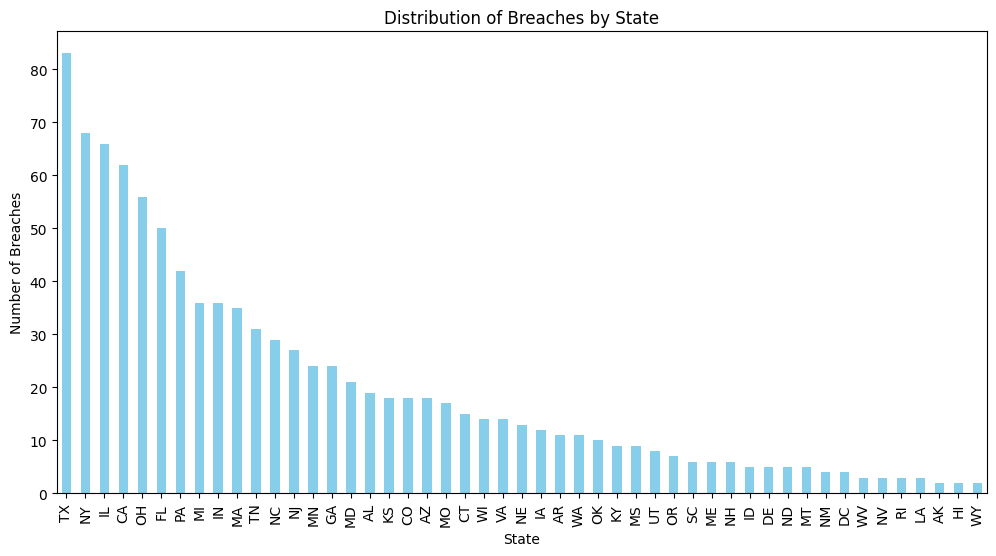

In [113]:
import matplotlib.pyplot as plt

state_breach_count = data['State'].value_counts()
state_breach_count.plot(kind='bar', figsize=(12, 6), title='Distribution of Breaches by State', color='skyblue')
plt.xlabel('State')
plt.ylabel('Number of Breaches')
plt.show()


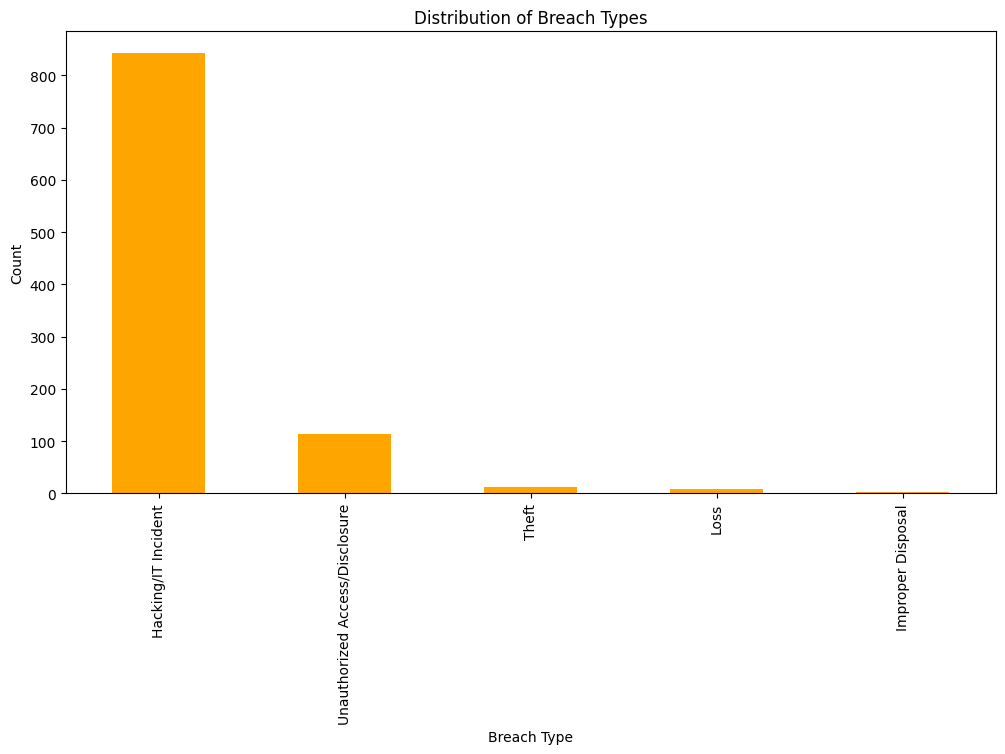

In [114]:
breach_type_count = data['Type of Breach'].value_counts()
breach_type_count.plot(kind='bar', figsize=(12, 6), title='Distribution of Breach Types', color='orange')
plt.xlabel('Breach Type')
plt.ylabel('Count')
plt.show()


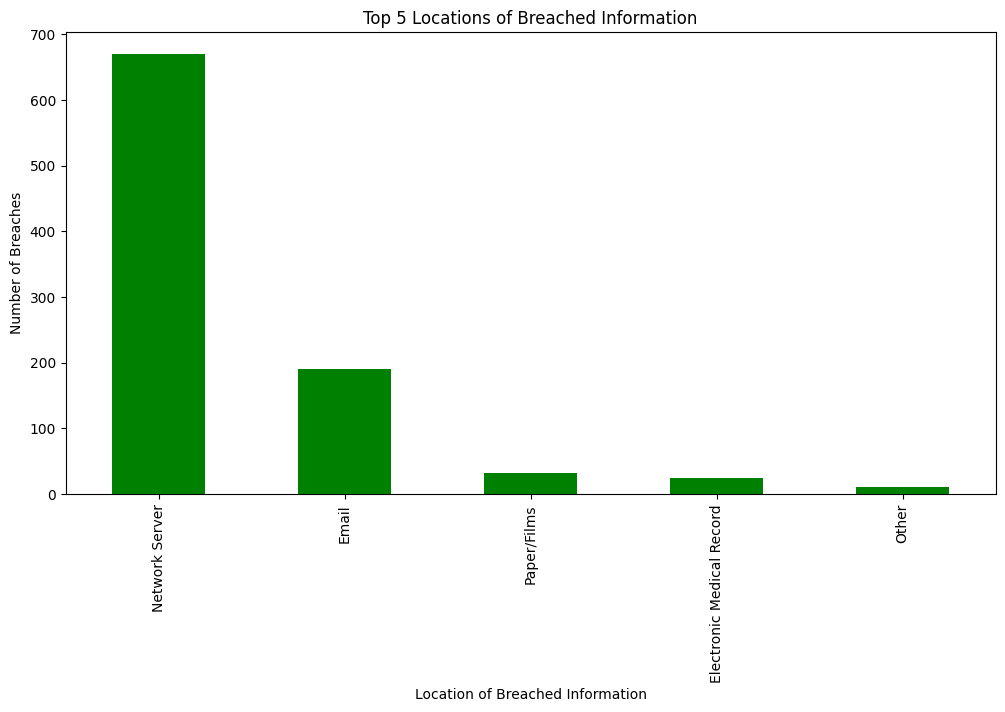

In [115]:
top_locations = data['Location of Breach'].value_counts().head(5)
top_locations.plot(kind='bar', figsize=(12, 6), title='Top 5 Locations of Breached Information', color='green')
plt.xlabel('Location of Breached Information')
plt.ylabel('Number of Breaches')
plt.show()


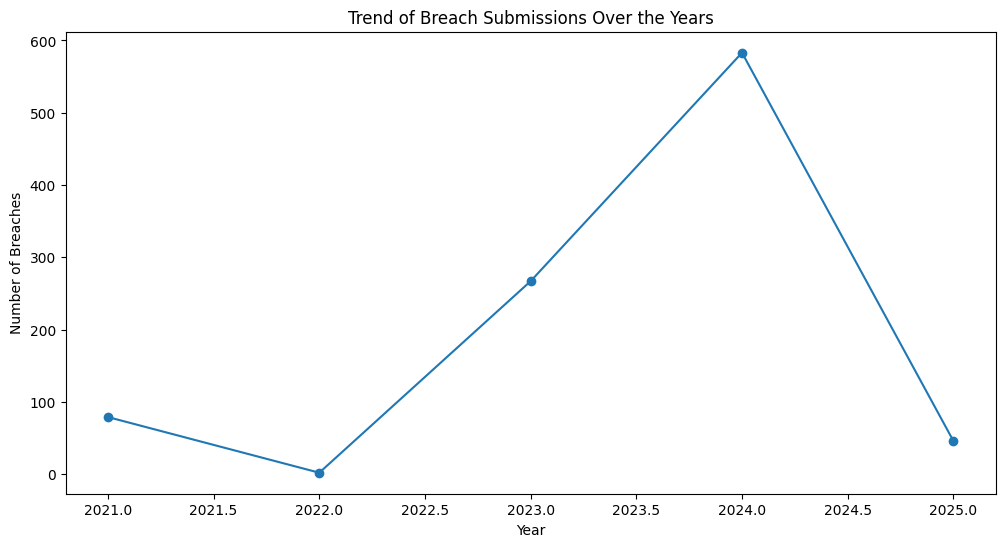

In [116]:
data['Breach Submission Date'] = pd.to_datetime(data['Breach Submission Date'], errors='coerce')
data['Year'] = data['Breach Submission Date'].dt.year
yearly_breach_count = data['Year'].value_counts().sort_index()
yearly_breach_count.plot(kind='line', figsize=(12, 6), title='Trend of Breach Submissions Over the Years', marker='o')
plt.xlabel('Year')
plt.ylabel('Number of Breaches')
plt.show()


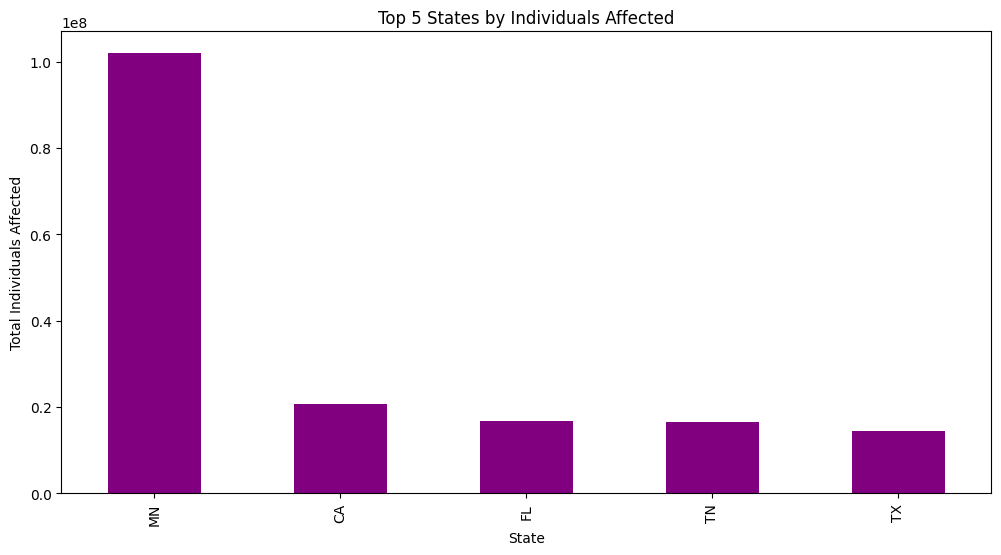

In [117]:
affected_by_state = data.groupby('State')['Individuals Affected'].sum().sort_values(ascending=False).head(5)
affected_by_state.plot(kind='bar', figsize=(12, 6), title='Top 5 States by Individuals Affected', color='purple')
plt.xlabel('State')
plt.ylabel('Total Individuals Affected')
plt.show()


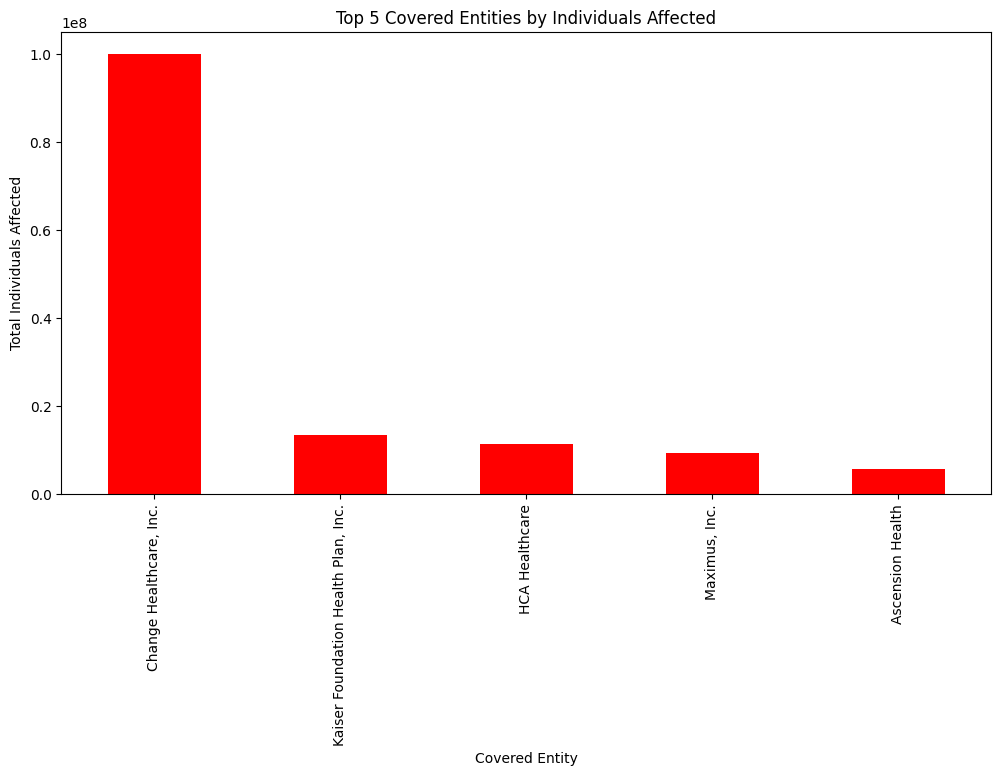

In [118]:
top_entities = data.groupby('Name of Covered Entity')['Individuals Affected'].sum().sort_values(ascending=False).head(5)
top_entities.plot(kind='bar', figsize=(12, 6), title='Top 5 Covered Entities by Individuals Affected', color='red')
plt.xlabel('Covered Entity')
plt.ylabel('Total Individuals Affected')
plt.show()
